In [23]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
from pylab import rcParams
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [24]:
data = pd.read_csv('PlayerCount.csv', delimiter = ',')
data

,DateTime,FFXIV,PoE,ESO
0,5/1/2015,5378,7639,2527
1,5/2/2015,6053,9259,3025
2,5/3/2015,6605,8717,3231
3,5/4/2015,6175,7930,2848
4,5/5/2015,5355,7120,2405
5,5/6/2015,5173,6731,2225
6,5/7/2015,5215,6614,2316
7,5/8/2015,5257,9572,2463
8,5/9/2015,6008,9714,2955
9,5/10/2015,6255,9817,2999


Text(0, 0.5, 'Player Count')

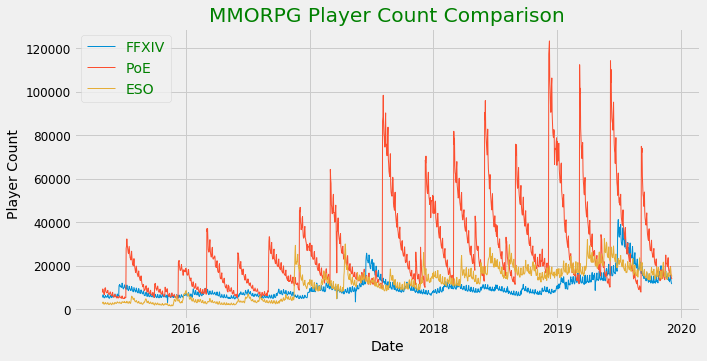

In [25]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
index = data.set_index('DateTime')
index.plot(figsize=(10, 5), linewidth = 1)
plt.title('MMORPG Player Count Comparison')
plt.xlabel('Date')
plt.ylabel('Player Count')

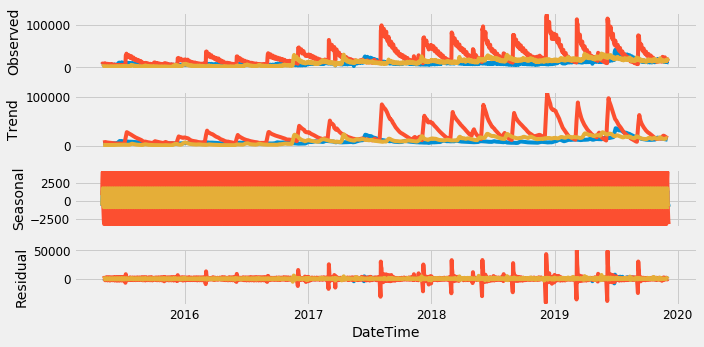

In [26]:
rcParams['figure.figsize'] = 10, 5
decomposition = sm.tsa.seasonal_decompose(index, model='additive')
fig = decomposition.plot()
plt.show()

In [27]:
p = d = q = range(0, 2)
pdqffxiv = list(itertools.product(p, d, q))
seasonal_pdqffxiv = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for paramffxiv in pdqffxiv:
    for param_seasonalffxiv in seasonal_pdqffxiv:
        try:
            modffxiv = sm.tsa.statespace.SARIMAX(index.FFXIV,order=paramffxiv,seasonal_order=param_seasonalffxiv,enforce_stationarity=False,enforce_invertibility=False)
            resultsffxiv = modffxiv.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(paramffxiv,param_seasonalffxiv,resultsffxiv.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:36094.03612289023
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:34755.94371153234
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:31132.040368714166
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:30879.51741857073
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:31133.368120009673
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:31085.301977334544
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:30908.17030929137
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:30813.696316650967
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:34851.482080487905
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:32133.094054889203
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:29893.617966927202
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:29497.494839764768
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:29864.62008993328
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:29697.32461113172
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:29624.20253851835
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:29469.082735352196
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:28621.01924347142
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:28212.59441174708
A

In [28]:
modffxiv = sm.tsa.statespace.SARIMAX(index.FFXIV,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultsffxiv = modffxiv.fit()
print(resultsffxiv.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4007      0.069     -5.797      0.000      -0.536      -0.265
ma.L1          0.5502      0.059      9.353      0.000       0.435       0.665
ar.S.L12      -0.2751      0.014    -20.213      0.000      -0.302      -0.248
ma.S.L12      -0.9999      0.008   -125.845      0.000      -1.016      -0.984
sigma2      1.339e+06   5.95e-09   2.25e+14      0.000    1.34e+06    1.34e+06


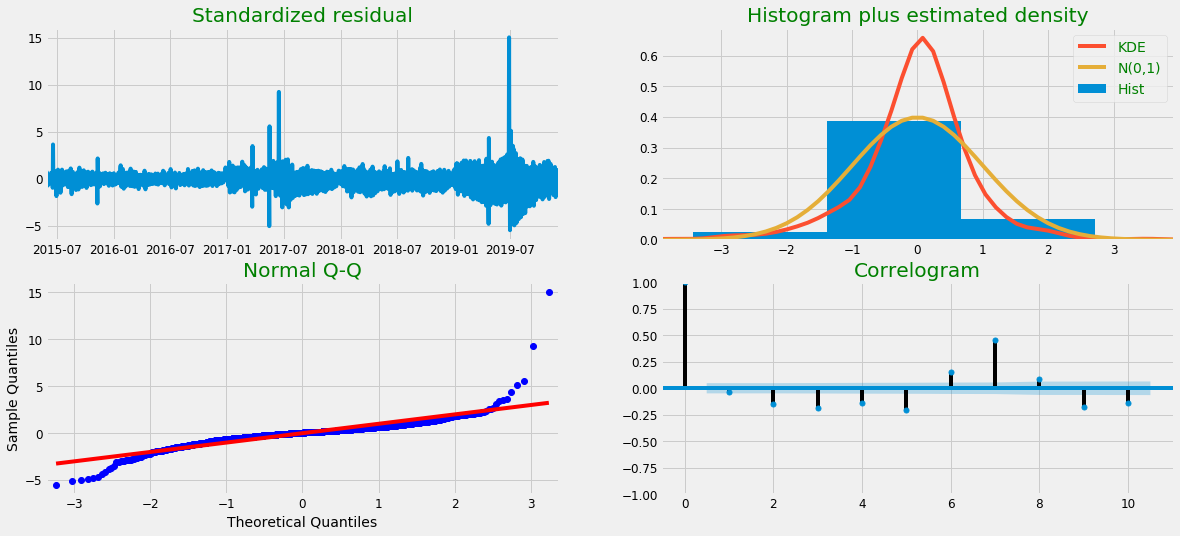

In [29]:
resultsffxiv.plot_diagnostics(figsize=(18, 8))
plt.show()

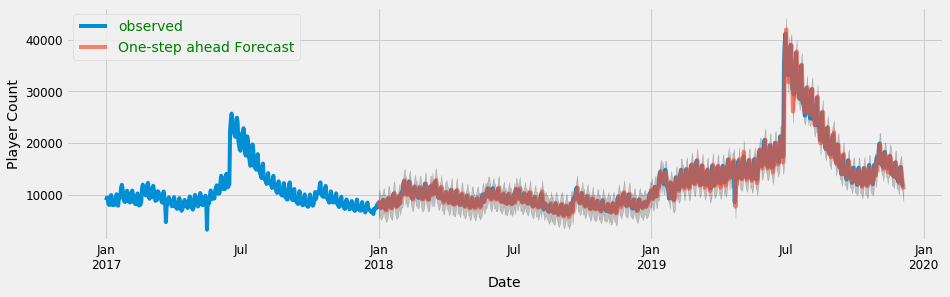

In [44]:
predffxiv = resultsffxiv.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ciffxiv = predffxiv.conf_int()
axffxiv = index.FFXIV['2017':].plot(label='observed')
predffxiv.predicted_mean.plot(ax=axffxiv, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
axffxiv.fill_between(pred_ciffxiv.index,
                pred_ciffxiv.iloc[:, 0],
                pred_ciffxiv.iloc[:, 1], color='k', alpha=.2)
axffxiv.set_xlabel('Date')
axffxiv.set_ylabel('Player Count')
plt.legend()
plt.show()

In [45]:
y_forecastedffxiv = predffxiv.predicted_mean
y_truthffxiv = index.FFXIV['2018-01-01':]
mseffxiv = ((y_forecastedffxiv - y_truthffxiv) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mseffxiv, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mseffxiv), 2)))

The Mean Squared Error is 2109185.92
The Root Mean Squared Error is 1452.3


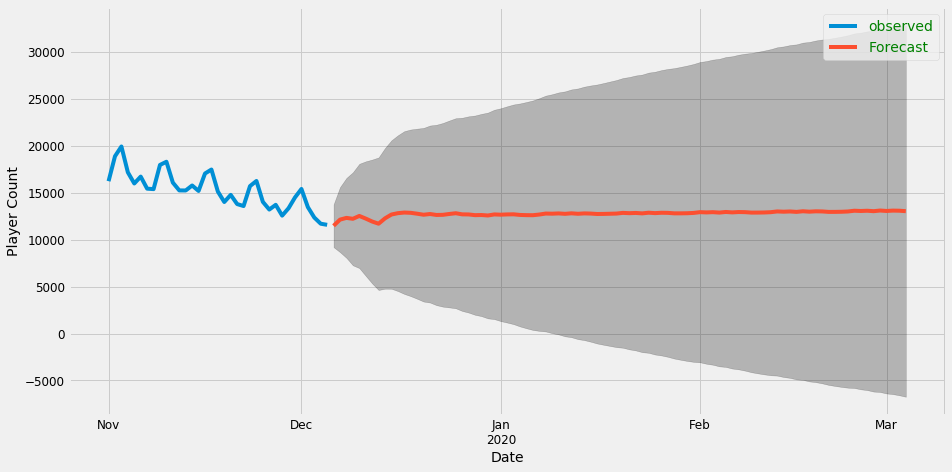

In [46]:
pred_ucffxiv = resultsffxiv.get_forecast(steps=90)
pred_ciffxiv = pred_ucffxiv.conf_int()
axffxiv = index.FFXIV['11-2019':].plot(label='observed', figsize=(14, 7))
pred_ucffxiv.predicted_mean.plot(ax=axffxiv, label='Forecast')
axffxiv.fill_between(pred_ciffxiv.index,
                pred_ciffxiv.iloc[:, 0],
                pred_ciffxiv.iloc[:, 1], color='k', alpha=.25)
axffxiv.set_xlabel('Date')
axffxiv.set_ylabel('Player Count')
plt.legend()
plt.show()

In [34]:
p = d = q = range(0, 2)
pdqpoe = list(itertools.product(p, d, q))
seasonal_pdqpoe = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for parampoe in pdqpoe:
    for param_seasonalpoe in seasonal_pdqpoe:
        try:
            modpoe = sm.tsa.statespace.SARIMAX(index.PoE,order=parampoe,seasonal_order=param_seasonalpoe,enforce_stationarity=False,enforce_invertibility=False)
            resultspoe = modpoe.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(parampoe,param_seasonalpoe,resultspoe.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:39701.3812714504
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:38663.086927782264
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:37668.22731712839
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:37188.518207453366
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:37541.24229330523
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:37466.870855169094
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:37347.82270336119
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:36974.01136182764
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:38528.457706423156
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:38046.338790289316
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:36614.5083118734
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:36117.30538258012
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:37971.75078852076
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:37893.02094217919
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:36308.70682532452
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:36053.09137725693
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:34506.99268743735
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:34269.34927924707
ARIMA(0

In [35]:
modpoe = sm.tsa.statespace.SARIMAX(index.PoE,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultspoe = modpoe.fit()
print(resultspoe.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0457      0.112     -0.406      0.685      -0.266       0.175
ma.S.L12      -0.9909      0.008   -129.311      0.000      -1.006      -0.976
sigma2      6.933e+07   2.48e-09   2.79e+16      0.000    6.93e+07    6.93e+07


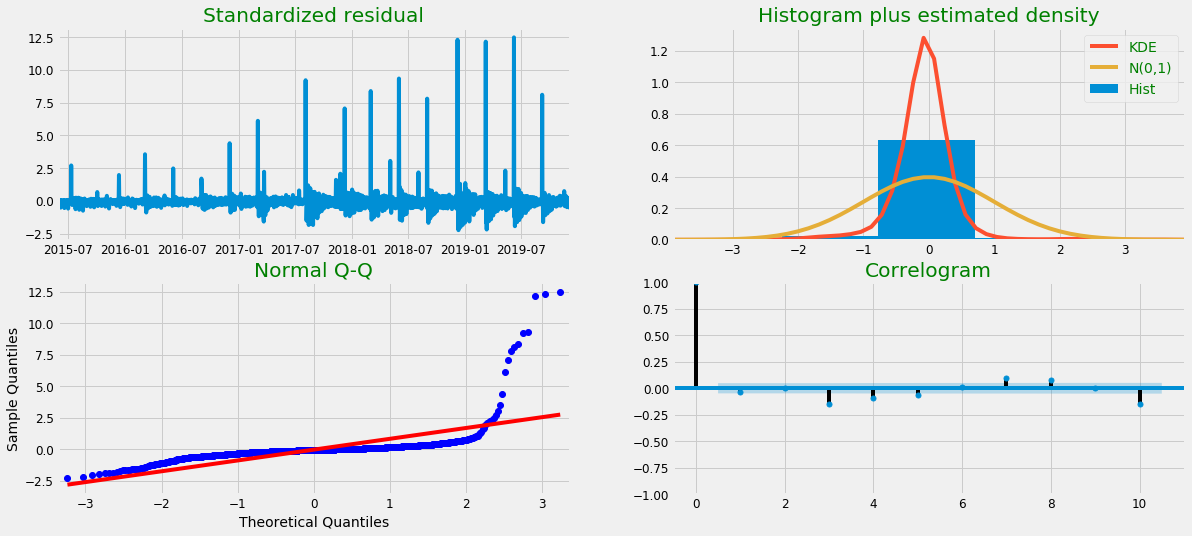

In [36]:
resultspoe.plot_diagnostics(figsize=(18, 8))
plt.show()

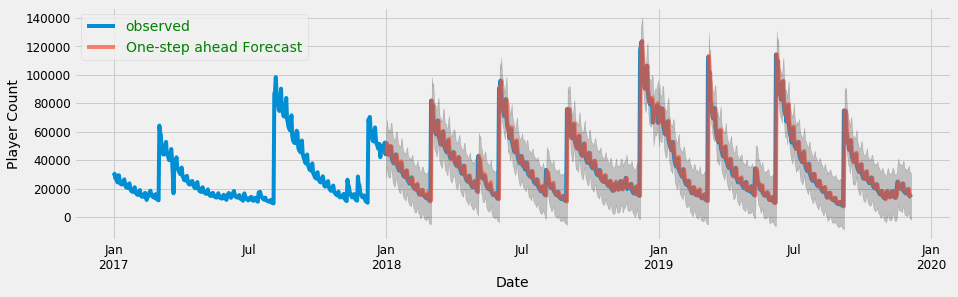

In [58]:
predpoe = resultspoe.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_cipoe = predpoe.conf_int()
axpoe = index.PoE['2017':].plot(label='observed')
predpoe.predicted_mean.plot(ax=axpoe, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
axpoe.fill_between(pred_cipoe.index,
                pred_cipoe.iloc[:, 0],
                pred_cipoe.iloc[:, 1], color='k', alpha=.2)
axpoe.set_xlabel('Date')
axpoe.set_ylabel('Player Count')
plt.legend()
plt.show()

In [59]:
y_forecastedpoe = predpoe.predicted_mean
y_truthpoe = index.PoE['2018-06-01':]
msepoe = ((y_forecastedpoe - y_truthpoe) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(msepoe, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(msepoe), 2)))

The Mean Squared Error is 100793400.38
The Root Mean Squared Error is 10039.59


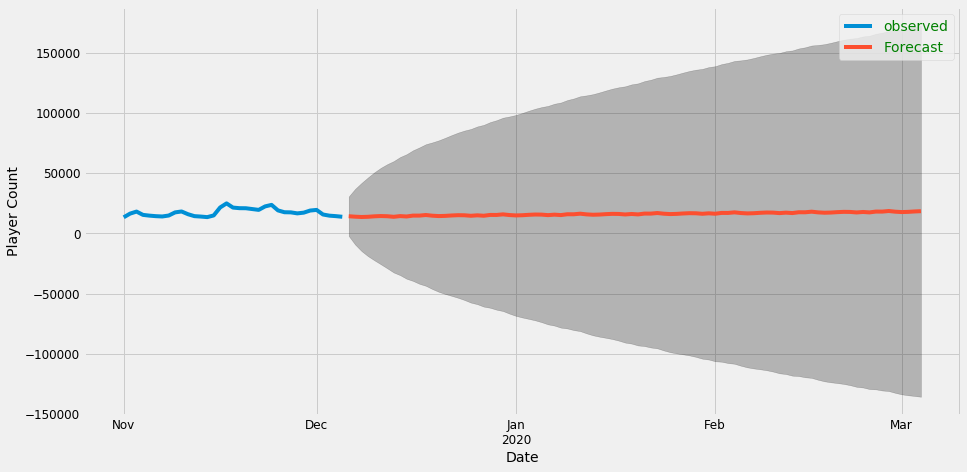

In [60]:
pred_ucpoe = resultspoe.get_forecast(steps=90)
pred_cipoe = pred_ucpoe.conf_int()
axpoe = index.PoE['11-2019':].plot(label='observed', figsize=(14, 7))
pred_ucpoe.predicted_mean.plot(ax=axpoe, label='Forecast')
axpoe.fill_between(pred_cipoe.index,
                pred_cipoe.iloc[:, 0],
                pred_cipoe.iloc[:, 1], color='k', alpha=.25)
axpoe.set_xlabel('Date')
axpoe.set_ylabel('Player Count')
plt.legend()
plt.show()

In [50]:
p = d = q = range(0, 2)
pdqeso = list(itertools.product(p, d, q))
seasonal_pdqeso = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for parameso in pdqeso:
    for param_seasonaleso in seasonal_pdqeso:
        try:
            modeso = sm.tsa.statespace.SARIMAX(index.ESO,order=parameso,seasonal_order=param_seasonaleso,enforce_stationarity=False,enforce_invertibility=False)
            resultseso = modeso.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(parameso,param_seasonaleso,resultseso.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:36731.44279450185
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:35439.1557718962
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:32168.449753437068
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:31558.2899718477
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:32164.510962304492
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:31776.17436888458
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:31778.26019533269
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:31513.24870367919
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:35481.195751431966
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:34958.72065213405
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:30777.093966886066
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:30010.654137762504
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:30775.283213216957
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:30221.33767987743
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:30517.264733180105
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:30001.5192656817
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:29252.087379631437
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:28909.382155078638
ARIM

In [51]:
modeso = sm.tsa.statespace.SARIMAX(index.ESO,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultseso = modeso.fit()
print(resultseso.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.006    150.427      0.000       0.936       0.960
ma.L1          0.1926      0.020      9.561      0.000       0.153       0.232
ar.S.L12      -0.2192      0.020    -11.005      0.000      -0.258      -0.180
ma.S.L12      -0.9588      0.008   -113.298      0.000      -0.975      -0.942
sigma2      2.035e+06   3.87e+04     52.519      0.000    1.96e+06    2.11e+06


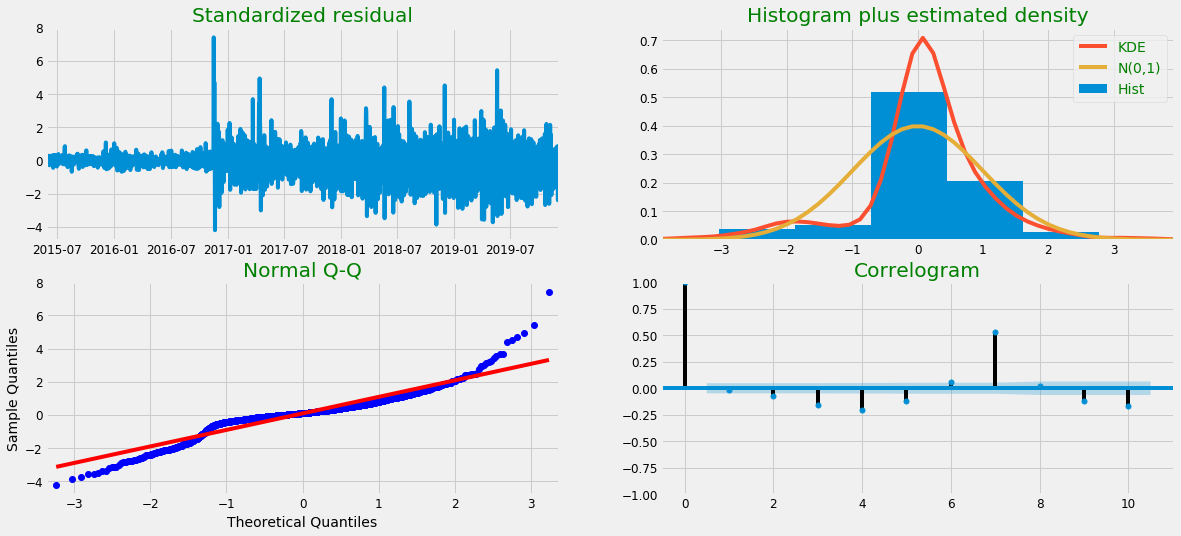

In [52]:
resultseso.plot_diagnostics(figsize=(18, 8))
plt.show()

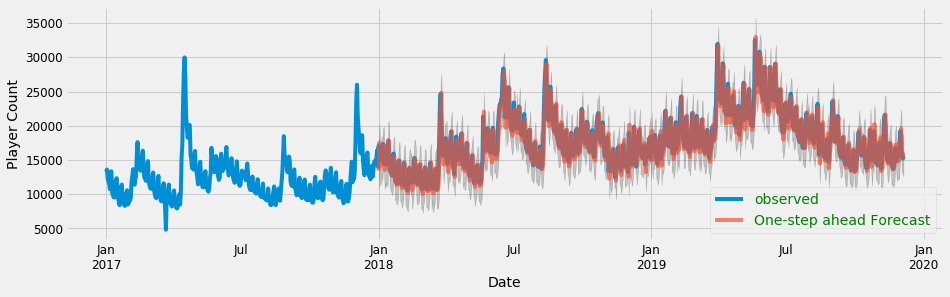

In [54]:
predeso = resultseso.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_cieso = predeso.conf_int()
axeso = index.ESO['2017':].plot(label='observed')
predeso.predicted_mean.plot(ax=axeso, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
axeso.fill_between(pred_cieso.index,
                pred_cieso.iloc[:, 0],
                pred_cieso.iloc[:, 1], color='k', alpha=.2)
axeso.set_xlabel('Date')
axeso.set_ylabel('Player Count')
plt.legend()
plt.show()

In [55]:
y_forecastedeso = predeso.predicted_mean
y_trutheso = index.ESO['2018-06-01':]
mseeso = ((y_forecastedeso - y_trutheso) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mseeso, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mseeso), 2)))

The Mean Squared Error is 3302131.32
The Root Mean Squared Error is 1817.18


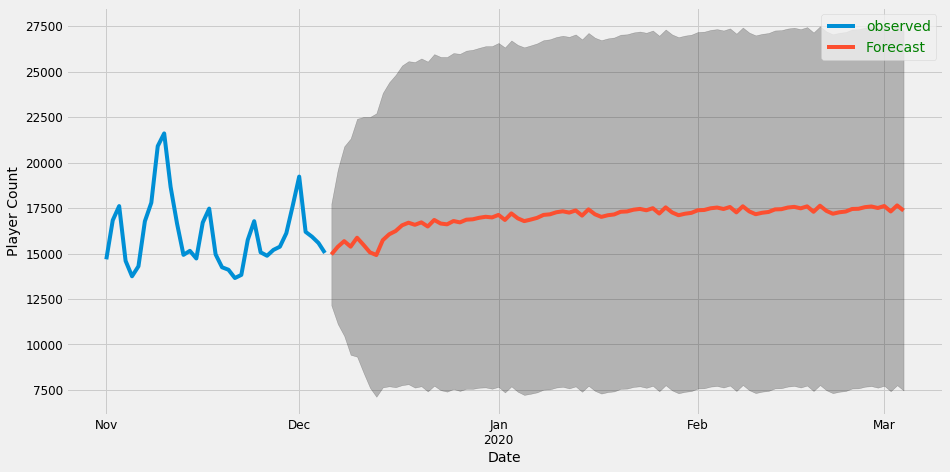

In [57]:
pred_uceso = resultseso.get_forecast(steps=90)
pred_cieso = pred_uceso.conf_int()
axeso = index.ESO['11-2019':].plot(label='observed', figsize=(14, 7))
pred_uceso.predicted_mean.plot(ax=axeso, label='Forecast')
axeso.fill_between(pred_cieso.index,
                pred_cieso.iloc[:, 0],
                pred_cieso.iloc[:, 1], color='k', alpha=.25)
axeso.set_xlabel('Date')
axeso.set_ylabel('Player Count')
plt.legend()
plt.show()